1. Importing libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

2. Importing dataframe

In [2]:
#Project folder path as a string
path = r'/Users/Nimrat/Documents/World Happiness Report'

In [3]:
#Import the data set into your notebook using the os library
df = pd.read_csv(os.path.join(path, 'Prepared data', 'world_happiness_report_wrangled.csv'))

3. Data cleaning

In [4]:
df.head()

,Unnamed: 0,country_name,year,life_ladder,gdp_per_capita,social_support,life_expectancy_birth,freedom_for_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [6]:
#Drop unnamed column
df = df.drop(columns=['Unnamed: 0'])

In [7]:
df.head()

,country_name,year,life_ladder,gdp_per_capita,social_support,life_expectancy_birth,freedom_for_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [8]:
df.shape

(2363, 11)

In [9]:
#Checking missing values
df.isnull().sum()

country_name                 0
year                         0
life_ladder                  0
gdp_per_capita               0
social_support               0
life_expectancy_birth        0
freedom_for_life_choices     0
generosity                   0
perceptions_of_corruption    0
positive_affect              0
negative_affect              0
dtype: int64

In [11]:
#Checking duplicates
df.duplicated().sum()

np.int64(0)

4. Exploring data visually

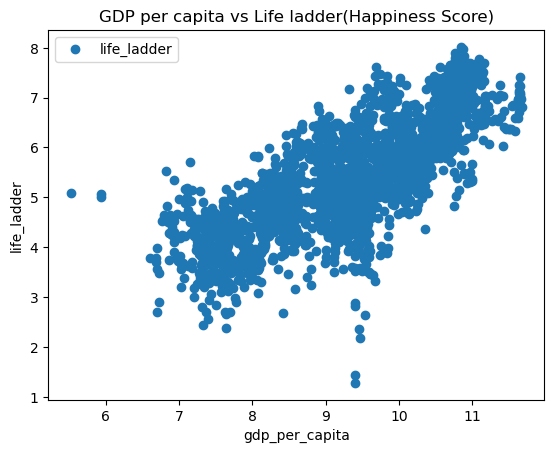

In [12]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'gdp_per_capita', y='life_ladder',style='o') 
plt.title('GDP per capita vs Life ladder(Happiness Score)')  
plt.xlabel('gdp_per_capita')  
plt.ylabel('life_ladder')  
plt.show()

5. Hypotheses

Countries with higher GDP per capita have higher life ladder (Happiness) scores.

6. Reshape the variables

In [13]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['gdp_per_capita'].values.reshape(-1,1)
y = df['life_ladder'].values.reshape(-1,1)

7. Split the data

In [14]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

8. Linear regression analysis

In [15]:
# Create a regression object.
regression = LinearRegression()

In [16]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

9. Create a plot

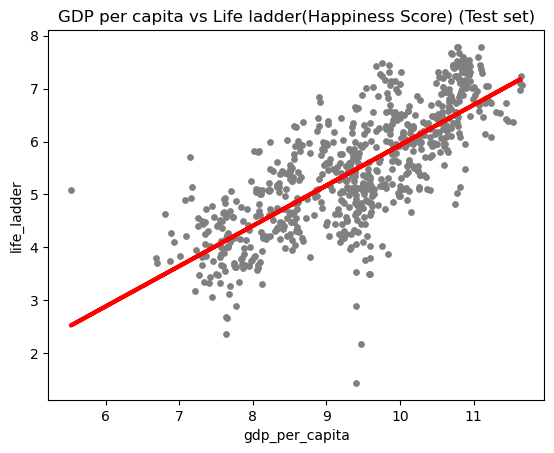

In [20]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per capita vs Life ladder(Happiness Score) (Test set)')
plot_test.xlabel('gdp_per_capita')
plot_test.ylabel('life_ladder')

#Export scatterplot before show
plt.savefig(os.path.join(path, 'Analysis', 'scat5_world_happiness_report.png'))

plot_test.show()

The scatterplot shows a clear positive relationship between GDP per capita and the Life Ladder (happiness score). As GDP per capita increases, happiness scores generally increase as well, which is reflected by the upward-sloping regression line.

11. Model performance satistics

In [21]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)  

In [22]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.76106552]]
Mean squared error:  0.5434094409914332
R2 score:  0.5776982542431153


12. Compare the predicted y values with the actual y values.

In [23]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.044,4.676421
1,5.979,6.244977
2,7.321,5.939028
3,4.071,3.915355
4,6.048,6.122445
5,7.776,6.764023
6,3.307,4.502898
7,5.168,5.202317
8,5.564,4.792864
9,4.719,5.779205


13. Thoughts on how well the model performed on the test set.

The regression model shows a moderate positive relationship between GDP per captial and life ladder(Happiness). The slope of 0.76 inddicates the higher GDP per capita is generally associated with higher happiness score. R2 score of 0.58 suggests that about 58% of the variation in happiness score is explained by GDP per capita. This indicates a reasonable model fit, a significant portion of the variation is  due to other factors such as social support, health,freedom etc. The mean squared error of 0.54 shows moderate prediction error, with some noticeable gaps between predicted and actual values.

Data bias may affect model performance. Countries with limited data or lower reporting may skew results. Cultural differences in how happiness is perceived and reported can introduce bias.